# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/johnson/Documents/GitHub/ML100Days/Homework/data/'

### 之前做過的處理

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [19]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.tail()

(307511, 124)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,AMT_INCOME_TOTAL_interval
307506,456251,0,0,M,0,0,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False,"(-91324.35, 58512825.0]"
307507,456252,0,0,F,0,1,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,True,"(-91324.35, 58512825.0]"
307508,456253,0,0,F,0,1,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,False,"(-91324.35, 58512825.0]"
307509,456254,1,0,F,0,1,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,"(-91324.35, 58512825.0]"
307510,456255,0,0,F,0,0,0,157500.0,675000.0,49117.5,...,0,0,0.0,0.0,0.0,2.0,0.0,1.0,False,"(-91324.35, 58512825.0]"


{'whiskers': [<matplotlib.lines.Line2D at 0x1df5b471e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1df5b47b588>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df5b471a20>],
 'medians': [<matplotlib.lines.Line2D at 0x1df5b47bc18>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df5b47bf60>],
 'means': []}

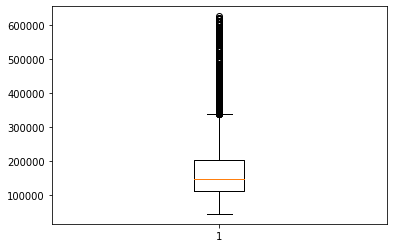

In [46]:
from scipy.stats.mstats import winsorize

df_array = np.array(app_train['AMT_INCOME_TOTAL'])
de_preprocessing = winsorize(df_array, limits=[0.005, 0.005])
df_convert = pd.DataFrame(de_preprocessing)

df_bottom, df_upper = int(df_convert.min()), int(df_convert.max())
index_range_2 = (app_train['AMT_INCOME_TOTAL']>df_bottom) & (app_train['AMT_INCOME_TOTAL']<df_upper)
df_cleaning = app_train[index_range_2]

plt.boxplot(df_cleaning['AMT_INCOME_TOTAL'])

In [53]:
df_cleaning['AMT_INCOME_TOTAL'].value_counts()

135000.000    35750
112500.000    31019
157500.000    26556
180000.000    24719
90000.000     22483
225000.000    20698
202500.000    16341
67500.000     11147
270000.000    10827
81000.000      6001
315000.000     5862
247500.000     5344
126000.000     4668
360000.000     4115
121500.000     3848
99000.000      3633
292500.000     3418
103500.000     3330
76500.000      3146
144000.000     3123
171000.000     2647
450000.000     2435
117000.000     2390
54000.000      2319
72000.000      2187
166500.000     2053
108000.000     1946
337500.000     1790
94500.000      1747
162000.000     1702
              ...  
203134.500        1
100629.000        1
404406.000        1
201267.000        1
50323.500         1
201361.500        1
100786.500        1
201658.500        1
100854.000        1
245046.600        1
201811.500        1
403650.000        1
100944.000        1
58950.000         1
101083.500        1
101119.500        1
303300.000        1
79425.000         1
101128.500        1


In [47]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
df_cleaning['DAYS_EMPLOYED_ANOM'] = df_cleaning["DAYS_EMPLOYED"] == 365243
df_cleaning['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
df_cleaning['DAYS_BIRTH'] = abs(df_cleaning['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [50]:
df_cleaning['AMT_INCOME_TOTAL_interval'] = pd.qcut(df_cleaning['AMT_INCOME_TOTAL'], 4)
df_cleaning['AMT_INCOME_TOTAL_interval'].value_counts()

C:\Users\johnson\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(45184.499, 112500.0]    97027
(148500.0, 202500.0]     80705
(202500.0, 625500.0]     69970
(112500.0, 148500.0]     54690
Name: AMT_INCOME_TOTAL_interval, dtype: int64

In [49]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

C:\Users\johnson\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


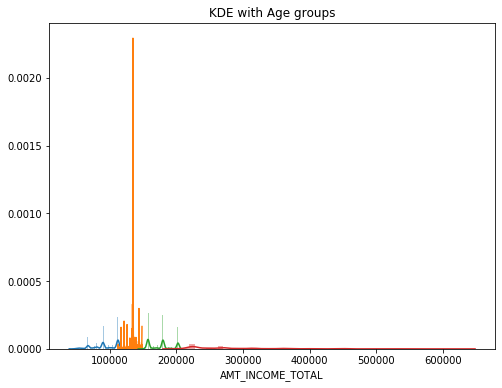

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

income_group_sorted = np.sort(df_cleaning['AMT_INCOME_TOTAL_interval'].unique())
# income_group_sorted
plt.figure(figsize=(8,6))
for i in range(len(income_group_sorted)):
    sns.distplot(df_cleaning.loc[(df_cleaning['AMT_INCOME_TOTAL_interval'] == income_group_sorted[i]), 'AMT_INCOME_TOTAL'], label = str(income_group_sorted[i]))
    
#     sns.distplot(age_data.loc[(app_train['YEARS_BINNED'] == income_group_sorted[i]), 'AMT_INCOME_TOTAL'], label = str(income_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()